area: 2.0
perimeter: 5.656854152679443
circularity: 0.785398190280483
centroid: (1177.5, 615.5)
area: 7201.0
perimeter: 570.6416968107224
circularity: 0.27789176051961373
centroid: (1293.5, 562.5)


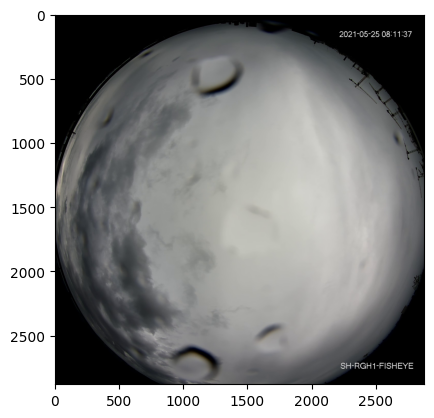

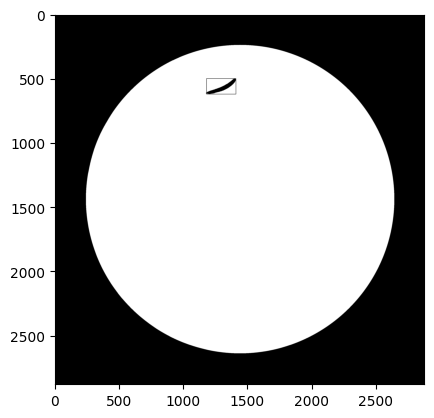

In [149]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read all-sky video frame from file or camera
frame = cv2.imread("rain.png")

# Get image dimensions
height, width, _ = frame.shape

# Create a black image with the same dimensions as the original image
mask = np.zeros((height, width), dtype=np.uint8)

# Draw a circle on the mask image
center = (width // 2, height // 2)
radius = 1200
cv2.circle(mask, center, radius, (255, 255, 255), -1)

# Apply the mask to the original image to remove obstacles at the horizon / distortion
masked_image = cv2.bitwise_and(frame, frame, mask=mask)

# Convert the image to grayscale
gray = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to smooth the image
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Apply thresholding to the grayscale image
_, thresh = cv2.threshold(blur, 35, 195, cv2.THRESH_BINARY)

# Use object recognition techniques to measure the size, shape, and position of the raindrops
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:

    # Measure the size of the raindrop
    area = cv2.contourArea(cnt)

    if(area < 400000): # hack to remove outer contour

        print("area:", area)

        # Measure the shape of the raindrop
        perimeter = cv2.arcLength(cnt, True)
        print("perimeter:", perimeter)
        circularity = 4*np.pi*(area/(perimeter*perimeter))
        print("circularity:", circularity)

        # Measure the position of the raindrop
        x,y,w,h = cv2.boundingRect(cnt)
        centroid = (x+w/2, y+h/2)
        print("centroid:", centroid)

        cv2.rectangle(thresh, (x,y), (x+w,y+h), (0,255,0), 2)

    

RGB_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(RGB_img)

plt.figure()
plt.imshow(thresh, cmap='gray')